In [1]:
import ConfinedBrownianAnalysis as cb


In [2]:
# from Data_analysis import Data_analysis
# from Dedrift import Dedrift
# from Data import Data
import matplotlib.pyplot as plt

import seaborn
import seaborn as sns


%matplotlib widget

custom_params = {
    "xtick.direction": "in",
    "ytick.direction": "in",
    "lines.markeredgecolor": "k",
    "lines.markeredgewidth": 1,
    "figure.dpi": 100,
    "text.usetex": False,
    "font.family": "serif",
}
sns.set_theme(context="notebook", style="ticks", rc=custom_params)

In [3]:
load_observables = True
save_observable = False
filename = "Observables.pickle"

In [4]:
if load_observables:
        analysis = cb.Load(filename)

In [5]:
data = cb.Data(file="example_trajectory.mat", fps=100, cutoff=120000)

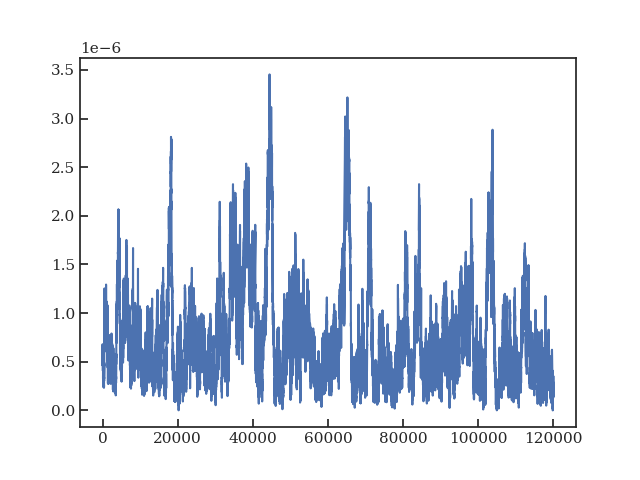

In [6]:
plt.figure()
plt.plot(data.z)
plt.show()

In [7]:
# args = {
#     "MSD_bins": 100,  # Number of PDF bins
#     "t_LMSD": (20.0, 25),  # Time used to compute the plateau
#     "t_sPDF": (0.01, 0.05),  # Short time PDF dispalcement
#     "range_pdf": (1e-8, 2.5e-6),  # Range of the height PDF
#     "num_pdf": 70,  # number of bins in the height PDF
#     "range_F_eq": (2e-8, 2e-6),
#     "num_F_eq": 20,
#     "SPDF_bins": 40,  # Short time PDF bins
#     "t_Lpdf": (18.0, 20.0),  # time for the long time PDF
#     "range_D": (1e-9, 2e-6),  # range of computation of Ronceray
#     "N_local_D": 200,  # mber of points for the diffusion computation
#     "ordre_D": 2,  # Ronceray polynomial order
#     "LPDF_bins": 50,  # number of bins in the long time PDF
# }

In [8]:
# data.dedrift(window=5000)
# if not load_observables:
#     analysis = cb.Observables(data, **args)

In [9]:
# data.plot_1D("z")

In [10]:
if not load_observables:
    analysis.computing_all()

In [11]:
# analysis.general_plot()

In [12]:
if save_observable:
        analysis.save(filename)


In [13]:
## test to reload it


## Minizer

In [14]:
Model = cb.Model()

In [15]:
args_minimizer = {
    "Model": Model,
    "analysis": analysis,
    "range_MSD_short": (1e-2, 1),
    "range_plateau_MSD": (1e-2, 1e-1),
    "range_C4_short": (1e-2, 1e-1),
    "range_diffusion": None,
    "range_Peq": None,
    "range_Feq": None,
}

In [16]:
analysis

In [17]:
import numpy as np
dz = np.linspace(-5e-6, 5e-6, 10000)

In [18]:
#Model.plateau_MSD()
P_Dz = Model.long_time_pdf(dz)

In [19]:
Minimizer = cb.Minimizer(**args_minimizer, method = "mean")

In [20]:
minimizer = Minimizer.available_minimizer

In [21]:
tot = 0
for i in minimizer:
    print("Computing " + i)
    err = getattr(Minimizer, i)()
    print(i + " = " + str(err))
    tot += err
print("everthing works ! At least without any error ...")
print("Total minimizer = " + str(tot))

Computing minimizer_MSD_short_time
minimizer_MSD_short_time = 0.005175703751671868
Computing minimizer_plateau_MSD
minimizer_plateau_MSD = 6.278516035972228e-13
Computing minimizer_C4_short_time
minimizer_C4_short_time = 0.2578985241196412
Computing minimizer_plateau_C4
minimizer_plateau_C4 = 2.6597940133014857e-05
Computing minimizer_diffusion
minimizer_diffusion = 37.793550398998995
Computing minimizer_Peq
minimizer_Peq = 0.02480718478524545
Computing minimizer_long_time_PDF
minimizer_long_time_PDF = 3.9915540284801496
Computing minimizer_short_time_PDF
minimizer_short_time_PDF = 0.2585610765855679
Computing minimizer_F_eq
minimizer_F_eq = 0.2668962877046977
everthing works ! At least without any error ...
Total minimizer = 42.59846980236673


In [24]:
Minimizer.method = "sum"

tot = 0
for i in minimizer:
    print("Computing " + i)
    err = getattr(Minimizer, i)()
    print(i + " = " + str(err))
    tot += err
print("everthing works ! At least without any error ...")
print("Total minimizer = " + str(tot))

Computing minimizer_MSD_short_time
minimizer_MSD_short_time = 0.4968675601604994
Computing minimizer_plateau_MSD
minimizer_plateau_MSD = 2.009125131511113e-11
Computing minimizer_C4_short_time
minimizer_C4_short_time = 6.963260151230312
Computing minimizer_plateau_C4
minimizer_plateau_C4 = 0.0002393814611971337
Computing minimizer_diffusion
minimizer_diffusion = 22676.130239399397
Computing minimizer_Peq
minimizer_Peq = 1.6372741958261998
Computing minimizer_long_time_PDF
minimizer_long_time_PDF = 3.9915540284801496
Computing minimizer_short_time_PDF
minimizer_short_time_PDF = 2.2910630877301568
Computing minimizer_F_eq
minimizer_F_eq = 5.071029466389256
everthing works ! At least without any error ...
Total minimizer = 22696.581527270697


In [ ]:
keys = list(analysis.short_time_PDF_Dy.keys())

In [ ]:
i = keys[0]

In [ ]:
dt = float(i) * analysis.Data.dt

In [ ]:
 dict_pdf_y = analysis.short_time_PDF_Dz[i]


In [ ]:
for i in keys:
    dt = float(i) * analysis.Data.dt
    dict_pdf_x = analysis.short_time_PDF_Dx[i]
    a = Model.P_D_short_time(dict_pdf_y["bin_center"], dt, axis="x")
    b = np.mean((dict_pdf_y["PDF"] - a ) ** 2 /  a ** 2 )
    print(b)

In [ ]:
i = keys[0]

In [ ]:
dt = float(i) * analysis.Data.dt
dict_pdf_x = analysis.short_time_PDF_Dx[i]
a = Model.P_D_short_time(dict_pdf_y["bin_center"], dt, axis="x")
b = np.mean((dict_pdf_y["PDF"] - a ) ** 2 /  a ** 2 )
print(b)

In [ ]:
plt.figure()
plt.semilogy(dict_pdf_y["bin_center"], a)
plt.plot(dict_pdf_y["bin_center"], dict_pdf_x["PDF"])

In [ ]:
plt.figure()
plt.semilogy(analysis.bins_centers_long_t,analysis.pdf_long_t)
plt.semilogy(analysis.bins_centers_long_t,pdf_long_time_th)

In [ ]:
plt.figure()
t_exp = Minimizer.t_MSD_short
plt.loglog(t_exp, Minimizer.MSD_short_exp[:,0], "o")
plt.loglog(t_exp, Minimizer.MSD_short_exp[:,1], "d")
plt.loglog(t_exp, Minimizer.MSD_short_exp[:,2], "d")

plt.plot(t_exp, Model.MSD_short_time(t_exp, axis="x"))
plt.plot(t_exp, Model.MSD_short_time(t_exp, axis="z"))

In [ ]:
sum ( (Minimizer.MSD_short_exp[:,0] - Model.MSD_short_time(t_exp, axis="x") ) ** 2   / Model.MSD_short_time(t_exp, axis="x") **2 )

In [ ]:
sum ( (Minimizer.MSD_short_exp[:,1] - Model.MSD_short_time(t_exp, axis="x") ) ** 2   / Model.MSD_short_time(t_exp, axis="x") **2 )

In [ ]:
sum ( (Minimizer.MSD_short_exp[:,2] - Model.MSD_short_time(t_exp, axis="z") ) ** 2   / Model.MSD_short_time(t_exp, axis="z") **2 )

In [ ]:
dz = np.linspace(-5e-6, 5e-6, 10000)
P_Dz = Model.long_time_pdf(dz)

In [ ]:
plt.figure()
plt.semilogy(dz, P_Dz)
plt.show()

In [ ]:
np.trapz(dz**4 * P_Dz, dz) - 3 * np.trapz(dz**2 * P_Dz, dz) ** 2